# An updated look at Global Covid data

In [57]:
import pandas as pd

In [2]:
# URL of where data originated (webscrape forbidden) so downloaded manually from
# 'https://data.humdata.org/dataset/coronavirus-covid-19-cases-and-deaths/resource/2ac6c3c0-76fa-4486-9ad0-9aa9e253b78d'
# https://covid19.who.int/WHO-COVID-19-global-data.csv

In [3]:
# storing the csv file as a dataframe into the variable 'covid_df'

covid_df = pd.read_csv('WHO-COVID-19-global-data.csv')

In [4]:
# checking it's a dataframe

type(covid_df)

pandas.core.frame.DataFrame

In [5]:
covid_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
51115,2023-12-31,ZW,Zimbabwe,AFRO,NaN,266048,NaN,5731
51116,2024-01-07,ZW,Zimbabwe,AFRO,46.0,266094,3.0,5734
51117,2024-01-14,ZW,Zimbabwe,AFRO,85.0,266179,3.0,5737
51118,2024-01-21,ZW,Zimbabwe,AFRO,55.0,266234,NaN,5737


In [6]:
# provides information about the dataframe

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51120 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      51120 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            51120 non-null  object 
 3   WHO_region         47286 non-null  object 
 4   New_cases          36698 non-null  float64
 5   Cumulative_cases   51120 non-null  int64  
 6   New_deaths         24249 non-null  float64
 7   Cumulative_deaths  51120 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [7]:
# looking at some metrics of the dataframe

covid_df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.669800e+04,5.112000e+04,24249.000000,5.112000e+04
mean,2.110387e+04,1.603651e+06,289.763083,1.878098e+04
std,2.792007e+05,7.198126e+06,1231.822612,7.815541e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,5.100000e+01,2.779000e+03,4.000000,2.100000e+01
50%,4.685000e+02,3.835000e+04,21.000000,4.130000e+02
75%,4.467750e+03,4.695240e+05,110.000000,6.123250e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.170784e+06


In [8]:
covid_df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

## Retreiving data from the dataframe

In [9]:
covid_df['New_cases']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
51115     NaN
51116    46.0
51117    85.0
51118    55.0
51119    31.0
Name: New_cases, Length: 51120, dtype: float64

In [10]:
# this shows it has the data type = series

type(covid_df['New_cases'])

pandas.core.series.Series

In [11]:
# like arrays, you can retrieve specific values with a series using index notation
# e.g. at index 246 we know there was 1002 new cases on that day

covid_df['New_cases'][246]

1002.0

In [12]:
# Pandas also has an at. method to directly retrieve at a specific row and column

covid_df.at[246, 'New_cases']

1002.0

In [13]:
# creating a view from the dataframe just looking at new cases
cases_df = covid_df[['Date_reported', 'New_cases']]
cases_df

,Date_reported,New_cases
0,2020-01-05,NaN
1,2020-01-12,NaN
2,2020-01-19,NaN
3,2020-01-26,NaN
4,2020-02-02,NaN
...,...,...
51115,2023-12-31,NaN
51116,2024-01-07,46.0
51117,2024-01-14,85.0
51118,2024-01-21,55.0


In [14]:
# another method for retrieving rows of a particular index - retrieves as a series object

covid_df.loc[243]

Date_reported        2020-08-02
Country_code                 AL
Country                 Albania
WHO_region                 EURO
New_cases                 706.0
Cumulative_cases           5276
New_deaths                 29.0
Cumulative_deaths           157
Name: 243, dtype: object

In [15]:
# for the first few months of values for 'new_cases' column are NAN - this is because the csv doesn't contain data for
# new cases until a certain date.

covid_df.at[0, 'New_cases']

nan

In [16]:
# the difference between 0 and NaN is important
# to find the first index that doesn't contain NaN value we can use 'first_valid_index' method

covid_df.New_cases.first_valid_index()

8

In [17]:
# checking to see if the first valud index for 'New_cases' is at the specified location (8)

covid_df.loc[1:10]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
5,2020-02-09,AF,Afghanistan,EMRO,NaN,0,NaN,0
6,2020-02-16,AF,Afghanistan,EMRO,NaN,0,NaN,0
7,2020-02-23,AF,Afghanistan,EMRO,NaN,0,NaN,0
8,2020-03-01,AF,Afghanistan,EMRO,1.0,1,NaN,0
9,2020-03-08,AF,Afghanistan,EMRO,NaN,1,NaN,0
10,2020-03-15,AF,Afghanistan,EMRO,6.0,7,NaN,0


In [18]:
# .sample method retrieves a random sample of rows from the dataframe

covid_df.sample(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
14336,2021-04-04,ER,Eritrea,AFRO,126.0,3334,1.0,10
30931,2020-11-22,MS,Montserrat,AMRO,NaN,13,NaN,1
15992,2020-05-03,FI,Finland,EURO,444.0,5965,8.0,290
21339,2020-10-04,XXI,Ickiribati,OTHER,NaN,0,NaN,0
47417,2022-07-10,TM,Turkmenistan,EURO,NaN,0,NaN,0
26560,2022-11-06,LR,Liberia,AFRO,10.0,8009,NaN,294
21577,2021-03-28,XXH,Icvanuatu,OTHER,NaN,0,NaN,0
4142,2021-10-31,BE,Belgium,EURO,53380.0,1367535,154.0,26127
36872,2020-06-14,PT,Portugal,EURO,1959.0,36933,31.0,1513
39811,2023-09-17,MF,Saint Martin (French part),NaN,NaN,12324,NaN,46


## Analysing the Data from the dataframe

In [19]:
# storing the sum of the new cases into 'total_cases' and sum of deaths into 'total_deaths'

total_cases = covid_df.New_cases.sum()
total_deaths = covid_df.New_deaths.sum()

In [20]:
print('The total number of cases globally up to the recorded date is ')
print(total_cases)
print('The total number of deaths globally up to the recorded date is ')
print(total_deaths)

The total number of cases globally up to the recorded date is 
774469939.0
The total number of deaths globally up to the recorded date is 
7026465.0


### What is the overall death rate?

In [21]:
# working out the death rate by dividing the total deaths by the total cases

death_rate = total_deaths/total_cases

print('The death rate globally up to the recorded date is ')
death_rate

The death rate globally up to the recorded date is 


0.009072611661432091

In [22]:
# 0.009 = 1% approx

## Looking only at days which had more than 1000 reported cases

In [23]:
high_new_cases = covid_df.New_cases > 1000

In [24]:
high_new_cases

0        False
1        False
2        False
3        False
4        False
         ...  
51115    False
51116    False
51117    False
51118    False
51119    False
Name: New_cases, Length: 51120, dtype: bool

In [25]:
# this variable only includes dates where new cases were over 1000

covid_df[high_new_cases]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
18,2020-05-10,AF,Afghanistan,EMRO,1392.0,3563,41.0,105
19,2020-05-17,AF,Afghanistan,EMRO,2490.0,6053,48.0,153
20,2020-05-24,AF,Afghanistan,EMRO,3813.0,9866,58.0,211
21,2020-05-31,AF,Afghanistan,EMRO,4577.0,14443,37.0,248
22,2020-06-07,AF,Afghanistan,EMRO,5108.0,19551,79.0,327
...,...,...,...,...,...,...,...,...
51023,2022-03-27,ZW,Zimbabwe,AFRO,1315.0,245767,11.0,5437
51031,2022-05-22,ZW,Zimbabwe,AFRO,1436.0,250642,12.0,5494
51032,2022-05-29,ZW,Zimbabwe,AFRO,1450.0,252092,6.0,5500
51033,2022-06-05,ZW,Zimbabwe,AFRO,1246.0,253338,10.0,5510


### Sorting rows using column values

In [26]:
# sorting the data by Date_reported

covid_df.sort_values('Date_reported', ascending=False).head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
51119,2024-01-28,ZW,Zimbabwe,AFRO,31.0,266265,NaN,5737
8519,2024-01-28,CF,Central African Republic,AFRO,NaN,15440,NaN,113
41108,2024-01-28,SA,Saudi Arabia,EMRO,NaN,841469,NaN,9646
19169,2024-01-28,GU,Guam,WPRO,NaN,52287,NaN,419
48989,2024-01-28,US,United States of America,AMRO,NaN,103436829,934.0,1170784
19382,2024-01-28,GT,Guatemala,AMRO,5.0,1250319,NaN,20201
40895,2024-01-28,ST,Sao Tome and Principe,AFRO,NaN,6734,NaN,80
19595,2024-01-28,GG,Guernsey,NaN,NaN,35326,NaN,67
40682,2024-01-28,SM,San Marino,EURO,NaN,25292,NaN,126
19808,2024-01-28,GN,Guinea,AFRO,NaN,38572,NaN,468


## Working with Dates

In [27]:
covid_df.Date_reported

0        2020-01-05
1        2020-01-12
2        2020-01-19
3        2020-01-26
4        2020-02-02
            ...    
51115    2023-12-31
51116    2024-01-07
51117    2024-01-14
51118    2024-01-21
51119    2024-01-28
Name: Date_reported, Length: 51120, dtype: object

In [28]:
# converting the date column into a 'datetime' data type

covid_df['date'] = pd.to_datetime(covid_df.Date_reported)

In [29]:
covid_df['date']

0       2020-01-05
1       2020-01-12
2       2020-01-19
3       2020-01-26
4       2020-02-02
           ...    
51115   2023-12-31
51116   2024-01-07
51117   2024-01-14
51118   2024-01-21
51119   2024-01-28
Name: date, Length: 51120, dtype: datetime64[ns]

In [30]:
# now we can extract parts of the date column into separate columns, using the DateTimeIndex

covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [31]:
# now we have new columns for specific dates/days

covid_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,date,year,month,day,weekday
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-01-05,2020,1,5,6
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-01-12,2020,1,12,6
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-01-19,2020,1,19,6
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-01-26,2020,1,26,6
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-02-02,2020,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51115,2023-12-31,ZW,Zimbabwe,AFRO,NaN,266048,NaN,5731,2023-12-31,2023,12,31,6
51116,2024-01-07,ZW,Zimbabwe,AFRO,46.0,266094,3.0,5734,2024-01-07,2024,1,7,6
51117,2024-01-14,ZW,Zimbabwe,AFRO,85.0,266179,3.0,5737,2024-01-14,2024,1,14,6
51118,2024-01-21,ZW,Zimbabwe,AFRO,55.0,266234,NaN,5737,2024-01-21,2024,1,21,6


In [32]:
# checking metrics for month of may

covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,date,year,month,day,weekday
17,2020-05-03,AF,Afghanistan,EMRO,841.0,2171,21.0,64,2020-05-03,2020,5,3,6
18,2020-05-10,AF,Afghanistan,EMRO,1392.0,3563,41.0,105,2020-05-10,2020,5,10,6
19,2020-05-17,AF,Afghanistan,EMRO,2490.0,6053,48.0,153,2020-05-17,2020,5,17,6
20,2020-05-24,AF,Afghanistan,EMRO,3813.0,9866,58.0,211,2020-05-24,2020,5,24,6
21,2020-05-31,AF,Afghanistan,EMRO,4577.0,14443,37.0,248,2020-05-31,2020,5,31,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51032,2022-05-29,ZW,Zimbabwe,AFRO,1450.0,252092,6.0,5500,2022-05-29,2022,5,29,6
51081,2023-05-07,ZW,Zimbabwe,AFRO,83.0,264766,2.0,5688,2023-05-07,2023,5,7,6
51082,2023-05-14,ZW,Zimbabwe,AFRO,75.0,264841,2.0,5690,2023-05-14,2023,5,14,6
51083,2023-05-21,ZW,Zimbabwe,AFRO,95.0,264936,1.0,5691,2023-05-21,2023,5,21,6


In [33]:
# extracting subset of columns to be aggregated

covid_df_may_metrics = covid_df_may[['New_cases', 'New_deaths']]
covid_df_may_metrics

,New_cases,New_deaths
17,841.0,21.0
18,1392.0,41.0
19,2490.0,48.0
20,3813.0,58.0
21,4577.0,37.0
...,...,...
51032,1450.0,6.0
51081,83.0,2.0
51082,75.0,2.0
51083,95.0,1.0


In [34]:
# getting the column sum and storing it in 'covid_may_totals'

covid_may_totals = covid_df_may_metrics.sum()

In [35]:
covid_may_totals

New_cases     47549322.0
New_deaths      701424.0
dtype: float64

In [36]:
type(covid_may_totals)

pandas.core.series.Series

In [37]:
# the operations above can be combined into a single statement for each weekday

covid_df[covid_df.month == 5][['New_cases', 'New_deaths']].sum()

New_cases     47549322.0
New_deaths      701424.0
dtype: float64

In [38]:
# lets check if number of cases on sundays is higher than the average number of cases reported every day

# overall average
covid_df.New_cases.mean()

21103.87320834923

In [39]:
# weekday == 6 as Sunday is the 7th day of the week (0 being monday as counts always start at 0 not 1)

covid_df[covid_df.weekday == 6].New_cases.mean()

21103.87320834923

In [40]:
# Looks like the data was only recorded on Sunday for the past 4 years, hence why all records are on the 6th day
# of the week and none on the rest

## Grouping and Aggregation

In [41]:
# this groups the data by month, the data is collected into monthly groups

covid_month_df = covid_df.groupby('month')[['New_cases', 'New_deaths']].sum()

In [42]:
# now the total number of entries is = to the number of groups we just made from the dataset
# month had 10 months of covid data so there is 10 entries/rows
# this dataframe is aggregated by sum

covid_month_df

,New_cases,New_deaths
month,,
1,164949986.0,849169.0
2,75712290.0,683171.0
3,63191473.0,491919.0
4,52227750.0,621226.0
5,47549322.0,701424.0
6,30846304.0,449401.0
7,53619669.0,475448.0
8,55875168.0,637686.0
9,38679912.0,462071.0


In [43]:
# this groups the data by year, the data is collected into yearly groups

covid_year_mean_df = covid_df.groupby('year')[['New_cases', 'New_deaths']].sum()

In [44]:
# this now shows the total cases & deaths per year

covid_year_mean_df

,New_cases,New_deaths
year,,
2020,80316790.0,1897533.0
2021,200297624.0,3549358.0
2022,424017189.0,1248805.0
2023,69329226.0,319867.0
2024,509110.0,10902.0


In [45]:
# calculating the running/cumulative sum of cases & deaths up to the current date shown
# storing each one in a new column into the dataframe

covid_df['total_cases'] = covid_df.New_cases.cumsum()
covid_df['total_deaths'] = covid_df.New_deaths.cumsum()

In [46]:
# now we have the running total of cases & deaths

covid_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,date,year,month,day,weekday,total_cases,total_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-01-05,2020,1,5,6,NaN,NaN
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-01-12,2020,1,12,6,NaN,NaN
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-01-19,2020,1,19,6,NaN,NaN
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-01-26,2020,1,26,6,NaN,NaN
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0,2020-02-02,2020,2,2,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51115,2023-12-31,ZW,Zimbabwe,AFRO,NaN,266048,NaN,5731,2023-12-31,2023,12,31,6,NaN,NaN
51116,2024-01-07,ZW,Zimbabwe,AFRO,46.0,266094,3.0,5734,2024-01-07,2024,1,7,6,774469768.0,7026462.0
51117,2024-01-14,ZW,Zimbabwe,AFRO,85.0,266179,3.0,5737,2024-01-14,2024,1,14,6,774469853.0,7026465.0
51118,2024-01-21,ZW,Zimbabwe,AFRO,55.0,266234,NaN,5737,2024-01-21,2024,1,21,6,774469908.0,NaN


## Writing Back to files

In [47]:
# selecting which columns to store in the file

results_df = covid_df[['Date_reported', 'Country', 'WHO_region', 'Country_code', 'New_cases', 'total_cases', 'New_deaths', 'total_deaths']]

In [48]:
results_df

,Date_reported,Country,WHO_region,Country_code,New_cases,total_cases,New_deaths,total_deaths
0,2020-01-05,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
1,2020-01-12,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
2,2020-01-19,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
3,2020-01-26,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
4,2020-02-02,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
51115,2023-12-31,Zimbabwe,AFRO,ZW,NaN,NaN,NaN,NaN
51116,2024-01-07,Zimbabwe,AFRO,ZW,46.0,774469768.0,3.0,7026462.0
51117,2024-01-14,Zimbabwe,AFRO,ZW,85.0,774469853.0,3.0,7026465.0
51118,2024-01-21,Zimbabwe,AFRO,ZW,55.0,774469908.0,NaN,NaN


In [49]:
# storing the results in a file called 'results.csv', while also removing the index (which is added by default)

results_df.to_csv('results.csv', index=None)

## Plotting with Pandas

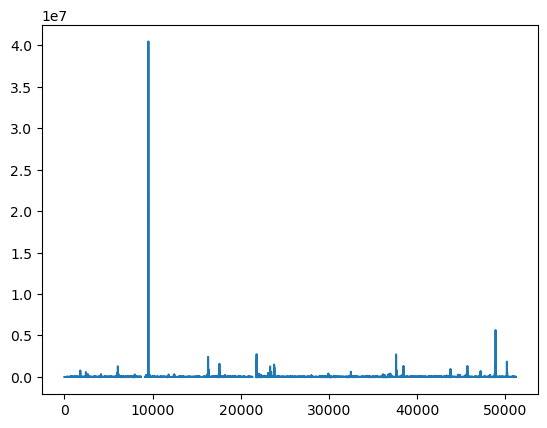

In [50]:
# plots of new cases

results_df.New_cases.plot();

In [51]:
# set the index to the 'Date_reported' column
# now the index numbers have been replaced with the date

results_df.set_index('Date_reported', inplace=True)
results_df

,Country,WHO_region,Country_code,New_cases,total_cases,New_deaths,total_deaths
Date_reported,,,,,,,
2020-01-05,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
2020-01-12,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
2020-01-19,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
2020-01-26,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
2020-02-02,Afghanistan,EMRO,AF,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-31,Zimbabwe,AFRO,ZW,NaN,NaN,NaN,NaN
2024-01-07,Zimbabwe,AFRO,ZW,46.0,774469768.0,3.0,7026462.0
2024-01-14,Zimbabwe,AFRO,ZW,85.0,774469853.0,3.0,7026465.0


In [52]:
# lets look at a specific date

results_df.loc['2021-01-03']

,Country,WHO_region,Country_code,New_cases,total_cases,New_deaths,total_deaths
Date_reported,,,,,,,
2021-01-03,Afghanistan,EMRO,AF,861.0,52709.0,63.0,2221.0
2021-01-03,Albania,EURO,AL,3343.0,290052.0,52.0,9168.0
2021-01-03,Algeria,AFRO,DZ,2302.0,666351.0,47.0,14356.0
2021-01-03,American Samoa,WPRO,AS,NaN,NaN,NaN,NaN
2021-01-03,Andorra,EURO,AD,360.0,854727.0,1.0,18586.0
...,...,...,...,...,...,...,...
2021-01-03,Viet Nam,WPRO,VN,54.0,762216369.0,NaN,NaN
2021-01-03,Wallis and Futuna,WPRO,WF,NaN,NaN,NaN,NaN
2021-01-03,Yemen,EMRO,YE,9.0,773844530.0,4.0,7015111.0


In [53]:
results_df.New_cases

Date_reported
2020-01-05     NaN
2020-01-12     NaN
2020-01-19     NaN
2020-01-26     NaN
2020-02-02     NaN
              ... 
2023-12-31     NaN
2024-01-07    46.0
2024-01-14    85.0
2024-01-21    55.0
2024-01-28    31.0
Name: New_cases, Length: 51120, dtype: float64

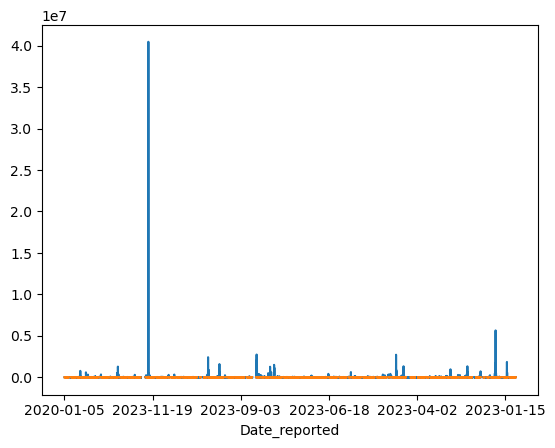

In [54]:
# plotting new cases & new deaths per day on a line graph

results_df.New_cases.plot()
results_df.New_deaths.plot();

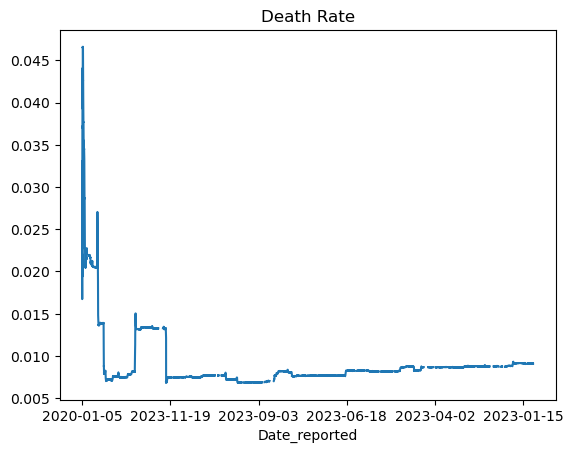

In [55]:
# how does the death rate vary over time

death_rate = results_df.total_deaths / results_df.total_cases
death_rate.plot(title='Death Rate');

<Axes: xlabel='month'>

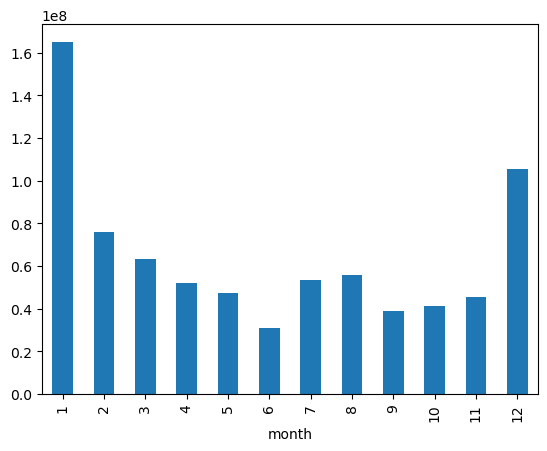

In [56]:
# month-wise graphs with a bar chart
# new cases

covid_month_df.New_cases.plot(kind='bar')

### The analysis of COVID-19 new cases over the past few years reveals a distinct seasonal trend, with the highest number of cases occurring during the winter months, specifically in December and January. This trend is indicative of a pattern where colder weather and increased indoor activities likely contribute to higher transmission rates.

### Following the peak in winter, there is a notable downtrend in new cases as we transition into the warmer months, particularly reaching a trough during the summer.

### Understanding this seasonal variation is crucial for public health officials and policymakers in implementing targeted interventions and resource allocation strategies to mitigate the spread of the virus